<a href="https://colab.research.google.com/github/plaban1981/Vision_Transformer_Model/blob/main/Hands_on_guide_to_using_Vision_transformer_for_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hands-on guide to using Vision transformer for Image classification

https://analyticsindiamag.com/hands-on-guide-to-using-vision-transformer-for-image-classification/

**Vision transformers** are one of the popular transformers in the field of deep learning. 

Before the origin of the vision transformers, we had to use convolutional neural networks in computer vision for complex tasks. 

With the introduction of vision transformers, we got one more powerful model for computer vision tasks as we have BERT and GPT for complex NLP tasks.

## About vision transformers
Vision transformer (ViT) is a transformer used in the field of computer vision that works based on the working nature of the transformers used in the field of natural language processing. 


Internally, the transformer learns by measuring the relationship between input token pairs. 

In computer vision, we can use the patches of images as the token. This relationship can be learned by providing attention in the network. 

This can be done either in conjunction with a convolutional network or by replacing some components of convolutional networks. These structures of the network can be applied to the image classification tasks.

## Implementing vision transformer for image classification

Step 1: Initializing setup

Step 2: Building network

Step 3 Building vision transformer 

Step 4: compile and train

## Step 1.1: Importing data  

CIFAR dataset
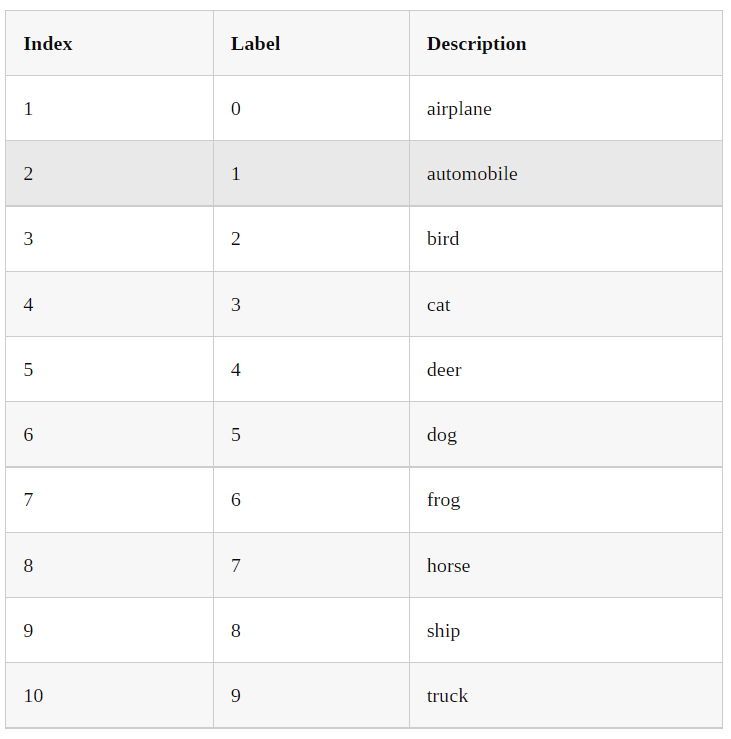

In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [2]:
print(f"x_train: {x_train.shape} - y_train: {y_train.shape}")
print(f"x_test: {x_test.shape} - y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3) - y_train: (50000, 1)
x_test: (10000, 32, 32, 3) - y_test: (10000, 1)


## Step 1.2: Defining hyperparameters

In [3]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72
patch_size = 6  
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [projection_dim * 2,projection_dim,] 
transformer_layers = 8
mlp_head_units = [2048, 1024]

## Step 1.3: Data augmentation

In [5]:
!pip install --quiet tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(72, 72),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
data_augmentation.layers[0].adapt(x_train)


## Step 1.4 visualizing images

(-0.5, 31.5, 31.5, -0.5)

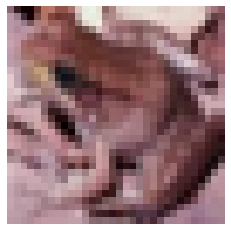

In [7]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

## Step 2: Building network

*  build  an MLP network and 
*  a layer that will separate our images into patches

In [8]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x